# Rating Prediction with Yelp Dataset
**Natural Language Processing with Scikit-Learn**

## [Convert Yelp Dataset to CSV using Pandas](https://link.medium.com/0k0DEb3Qy1)


---


[GitHub Repo](https://github.com/gyhou/yelp_dataset)

https://www.yelp.com/dataset/

## Import CSV files

In [0]:
import numpy as np
import pandas as pd
from glob import glob
# merge csv files
def merge_files(SOURCE):
    files_list = sorted(glob(SOURCE + '\*'))
    df_list = []
    for num, path in enumerate(files_list):
        df = pd.read_csv(path)
        df = df.drop(['business_id','city','date','funny','state','useful','cool'], axis=1)
        df = df.rename(columns={'stars_y':'review_stars'})
        df_list.append(df)
    df = pd.concat(df_list, join='outer', ignore_index=True, axis=0, sort=True)
    return df

SOURCE = 'AZ_top20_categories'
yelp = merge_files(SOURCE)
yelp = yelp.drop(['stars','stars_x'], axis=1)
print(yelp.shape)
yelp.head()

(3010486, 3)


,categories,review_stars,text
0,Active Life,5,Douglas W. has it right. You're basically on ...
1,Active Life,2,"Nice place, but they think nothing of running ..."
2,Active Life,5,Absolutely beautiful! I think I could stay her...
3,Active Life,5,I see 4 star ratings and can't figure out how ...
4,Active Life,1,"In the 8 years I have owned my mountain bike, ..."


## Part 1: Tokenize Function

In [0]:
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

# remove additional words from token
STOPWORDS = set(STOPWORDS).union(set(['said', 'mr', 'mrs']))

def tokenize(text):
    return [token for token in simple_preprocess(text) if token not in STOPWORDS]

In [0]:
yelp['categories'].value_counts().index

Index(['Restaurants', 'Food', 'Nightlife', 'Shopping', 'Beauty & Spas',
       'Home Services', 'Event Planning & Services', 'Automotive',
       'Health & Medical', 'Local Services', 'Fast Food', 'Active Life',
       'Auto Repair', 'Doctors', 'Hair Salons', 'Home & Garden', 'Fashion',
       'Professional Services', 'Real Estate', 'Contractors'],
      dtype='object')

In [0]:
Contractors_yelp = yelp[yelp['categories']=='Contractors']
print(Contractors_yelp.shape)
Contractors_yelp.head()

(25861, 3)


,categories,review_stars,text
381196,Contractors,1,Went out of my way to get paint at this store ...
381197,Contractors,2,Took the contractor's label off of the paint t...
381198,Contractors,5,We are remodeling & had already picked a diffe...
381199,Contractors,5,Everyone is so friendly here! Can't say the sa...
381200,Contractors,1,Terrible cust service. Wanted to buy a machine...


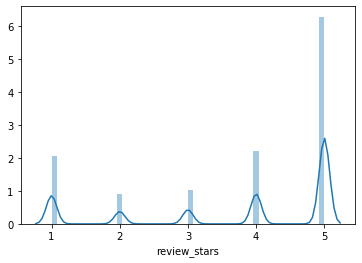

In [0]:
import seaborn as sns
sns.distplot(yelp['review_stars']);

In [0]:
# yelp['tokens'] = yelp['text'].apply(tokenize)
# yelp['tokens'].head()

0    [douglas, right, basically, mini, vacation, vi...
1    [nice, place, think, running, db, grass, blowe...
2    [absolutely, beautiful, think, stay, forever, ...
3    [star, ratings, figure, possible, maybe, someb...
4    [years, owned, mountain, bike, different, shop...
Name: tokens, dtype: object

## Part 2: Classification

In [0]:
# Import Statements
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer # Term frequency (TF) - Inverse Document Frequency (IDF)

In [0]:
# Instances for pipeline
sgdc = SGDClassifier()
rfc = RandomForestClassifier()
vect = TfidfVectorizer(stop_words='english', ngram_range=(1,1))

In [0]:
# Specify the pipeline
pipe = Pipeline([('vect', vect), ('rfc', rfc)])
# pipe = Pipeline([('vect', vect), ('clf', sgdc)])
pipe.fit(Contractors_yelp['text'], Contractors_yelp['review_stars'])

Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_patte...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                               

In [0]:
my_review = ["Service is great and the wait time is short"]
pipe.predict(my_review)[0]

5

In [0]:
type(my_review)

list

## Pickle the model

In [0]:
import pickle
pickle.dump(pipe, open('Contractors_yelp_review_predict_star.pkl', 'wb'))